## Gas Prices: Data Visualization

Visualizations of Data from many Sources

**Seaborn**

## Import 

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Dataset
raw_data = pd.read_csv('datasets/polttoneste_hinnat1988-2025.csv', skiprows=1, encoding='latin1')
raw_data

,Kuukausi,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
0,1988M01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1,1988M01,"Dieselöljy, snt/l",40.0,.
2,1988M01,"Kevyt polttoöljy, snt/l",16.0,.
3,1988M01,"Kevyt polttoöljy, eur/MWh",16.1,.
4,1988M02,"Moottoribensiini 95 E 10, snt/l",56.0,.
...,...,...,...,...
1783,2025M02,"Kevyt polttoöljy, eur/MWh",132.4,-11.4
1784,2025M03,"Moottoribensiini 95 E 10, snt/l",179.0,-6.8
1785,2025M03,"Dieselöljy, snt/l",179.0,-7.7
1786,2025M03,"Kevyt polttoöljy, snt/l",126.0,-12.5


## Preprocess data

Indexing

Create new dataframes for each fuel type

In [3]:
# data preprocessing
dates = pd.to_datetime(raw_data['Kuukausi'], format="%YM%m")

# set index refactored dates
raw_data = raw_data.set_index(dates) 

# remove old column
raw_data = raw_data.drop(columns=['Kuukausi']) 

raw_data['Hinta'] = pd.to_numeric(raw_data['Hinta'], errors='coerce') # Set hinta column as numeric

raw_data 

,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
Kuukausi,,,
1988-01-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-01-01,"Dieselöljy, snt/l",40.0,.
1988-01-01,"Kevyt polttoöljy, snt/l",16.0,.
1988-01-01,"Kevyt polttoöljy, eur/MWh",16.1,.
1988-02-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
...,...,...,...
2025-02-01,"Kevyt polttoöljy, eur/MWh",132.4,-11.4
2025-03-01,"Moottoribensiini 95 E 10, snt/l",179.0,-6.8
2025-03-01,"Dieselöljy, snt/l",179.0,-7.7


In [4]:
# filter gasoline data
gas_price_data = raw_data[~raw_data['Polttoneste'].isin(['Kevyt polttoöljy, snt/l', 'Kevyt polttoöljy, eur/MWh', 'Dieselöljy, snt/l'])]
gas_price_data

,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
Kuukausi,,,
1988-01-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-02-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-03-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-04-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-05-01,"Moottoribensiini 95 E 10, snt/l",56.3,.
...,...,...,...
2024-11-01,"Moottoribensiini 95 E 10, snt/l",175.0,-10.3
2024-12-01,"Moottoribensiini 95 E 10, snt/l",176.0,-5.9
2025-01-01,"Moottoribensiini 95 E 10, snt/l",179.0,1.7


In [5]:
diesel_price_data = raw_data[~raw_data['Polttoneste'].isin(['Kevyt polttoöljy, snt/l', 'Kevyt polttoöljy, eur/MWh', 'Moottoribensiini 95 E 10, snt/l'])]
diesel_price_data

,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
Kuukausi,,,
1988-01-01,"Dieselöljy, snt/l",40.0,.
1988-02-01,"Dieselöljy, snt/l",40.0,.
1988-03-01,"Dieselöljy, snt/l",40.0,.
1988-04-01,"Dieselöljy, snt/l",39.7,.
1988-05-01,"Dieselöljy, snt/l",39.9,.
...,...,...,...
2024-11-01,"Dieselöljy, snt/l",172.0,-15.3
2024-12-01,"Dieselöljy, snt/l",177.0,-10.2
2025-01-01,"Dieselöljy, snt/l",180.0,-1.6


Set index and remove unwanted columns

## Basic Plots

Line, Scatter, Box

In [6]:
# copy df with resetted index (not used right now)
raw_gas_price_data = gas_price_data.reset_index() 

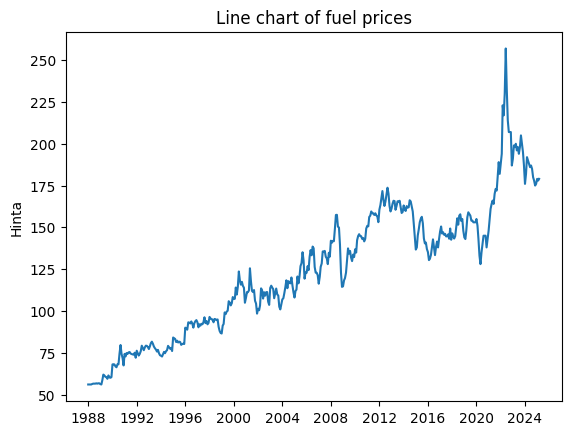

In [7]:
sns.lineplot(x=gas_price_data.index.values, y="Hinta", data=gas_price_data)
plt.title('Line chart of fuel prices')
plt.show()

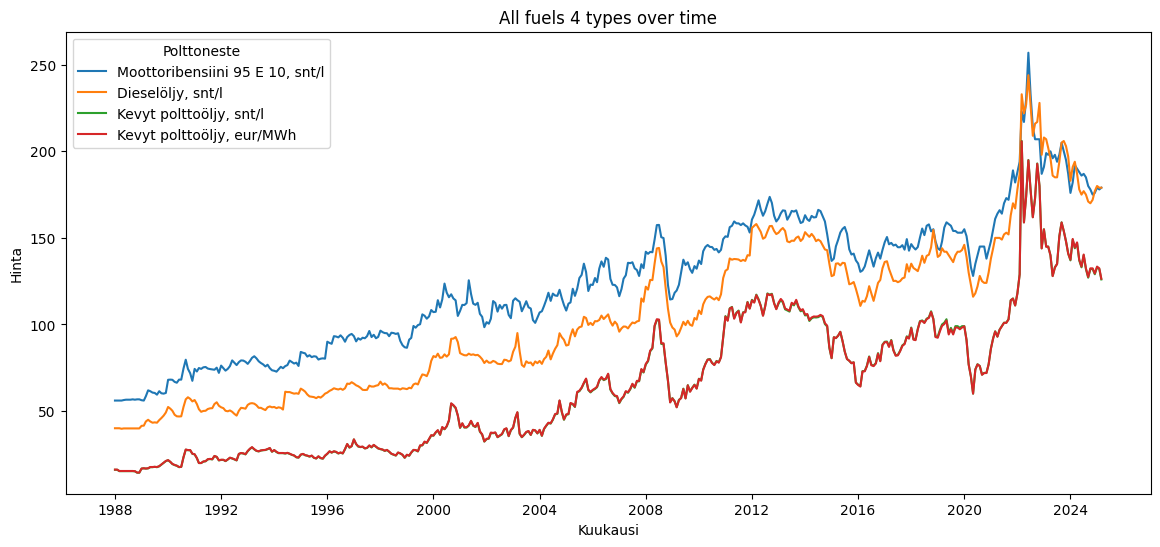

In [8]:
# multi line plot with hue
plt.figure(figsize=(14,6))
sns.lineplot(x=raw_data.index, y='Hinta', hue='Polttoneste', data=raw_data)
plt.title("All fuels 4 types over time")
plt.show()

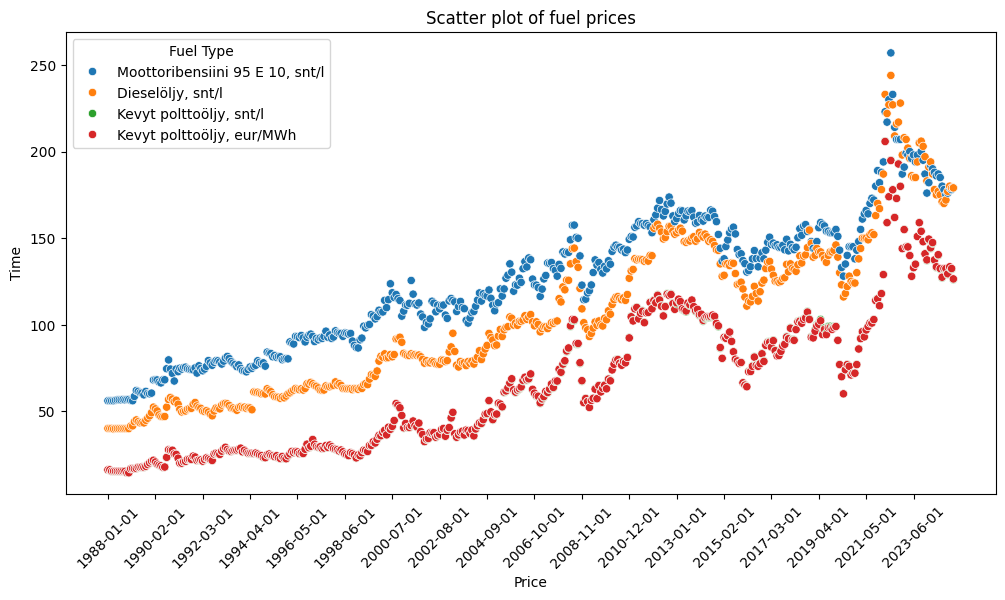

In [9]:
# Scatter plot
plt.figure(figsize=(12, 6))  # width=12 inches, height=6 inches
# plot
sns.scatterplot(
    x=raw_data.index.values, 
    y='Hinta', 
    hue='Polttoneste',  # different colors for each fuel
    data=raw_data
)
# Show only every 10th tick on y-axis
ticks = raw_data.index[::100]
plt.xticks(ticks, rotation=45)  # rotate 45 degrees
# labels and show plot
plt.xlabel("Price")
plt.ylabel("Time")
plt.title("Scatter plot of fuel prices")
plt.legend(title='Fuel Type')
plt.show()

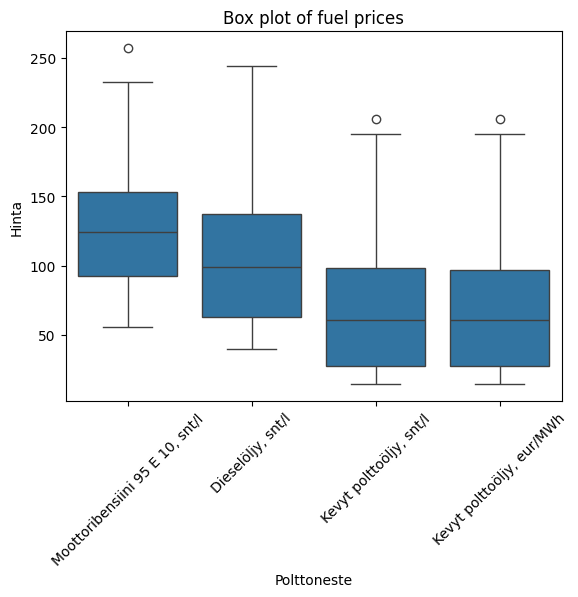

In [10]:
# Box plot of all 4 fuel prices over time
sns.boxplot(x='Polttoneste', y='Hinta', data=raw_data)
plt.xticks(rotation=45)  # Rotate x-axis labels 45 degrees
plt.title("Box plot of fuel prices")
plt.show()


### Advanced plot

In [11]:
# 12-month rolling averages for each fuel type
# first copy the dataframes to avoid SettingWithCopyWarning
gas_price_data = gas_price_data.copy()
diesel_price_data = diesel_price_data.copy()

# Gasoline 95 E10 snt/l
gas_price_data['Rolling_Hinta'] = gas_price_data.groupby('Polttoneste')['Hinta'].transform(lambda x: x.rolling(12, min_periods=1).mean())
# Diesel 10 snt/l
diesel_price_data['Rolling_Hinta'] = diesel_price_data.groupby('Polttoneste')['Hinta'].transform(lambda x: x.rolling(12, min_periods=1).mean())

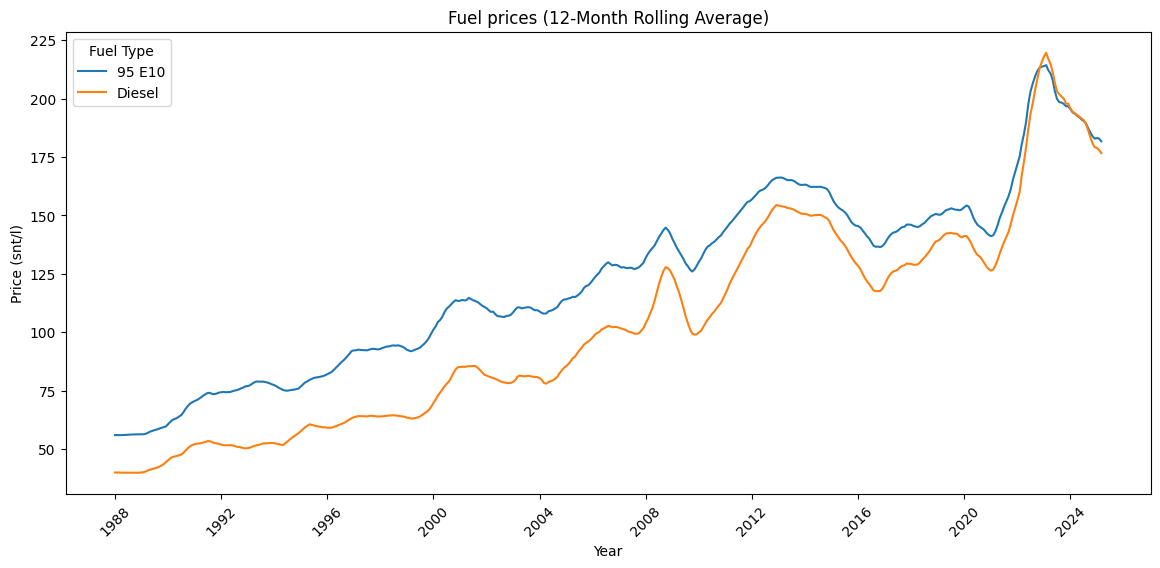

In [12]:
# Plot rolling averages
plt.figure(figsize=(14,6))
sns.lineplot(x=gas_price_data.index, y='Rolling_Hinta', data=gas_price_data, label='95 E10')
sns.lineplot(x=diesel_price_data.index, y='Rolling_Hinta', data=diesel_price_data, label='Diesel')
plt.title("Fuel prices (12-Month Rolling Average)")
plt.xlabel("Year")
plt.ylabel("Price (snt/l)")
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.show()

In [15]:
# filter last (2018-2023) gasoline and diesel
five_years_data = raw_data[
    (raw_data.index >= '01-01-2018') & # last five years 
    (raw_data['Polttoneste'].isin(['Moottoribensiini 95 E 10, snt/l', 'Dieselöljy, snt/l'])) # only diesel and gasoline
    ]

five_years_data

,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
Kuukausi,,,
2018-01-01,"Moottoribensiini 95 E 10, snt/l",146.4,-0.7
2018-01-01,"Dieselöljy, snt/l",135.1,-0.7
2018-02-01,"Moottoribensiini 95 E 10, snt/l",144.5,-4.0
2018-02-01,"Dieselöljy, snt/l",132.6,-2.9
2018-03-01,"Moottoribensiini 95 E 10, snt/l",143.3,-2.1
...,...,...,...
2025-01-01,"Dieselöljy, snt/l",180.0,-1.6
2025-02-01,"Moottoribensiini 95 E 10, snt/l",178.0,-2.2
2025-02-01,"Dieselöljy, snt/l",179.0,-6.3


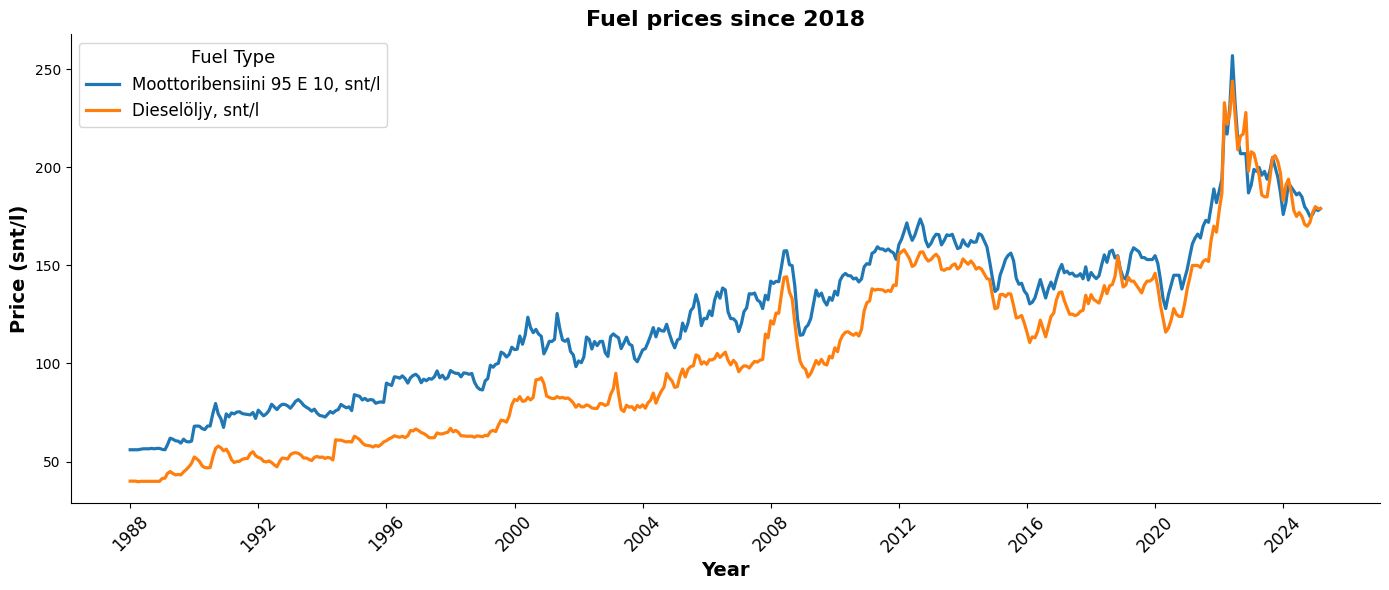

In [14]:
# multi line plot using hue
plt.figure(figsize=(14,6))
sns.lineplot(x=five_years_data.index, y='Hinta', hue='Polttoneste', data=five_years_data, linewidth=2.3)
# styling
sns.despine()
plt.title("Fuel prices since 2018", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=14, weight='bold')
plt.ylabel("Price (snt/l)", fontsize=14, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Fuel Type", fontsize=12, title_fontsize=13)
plt.tight_layout()

plt.show()